# Benchmark over large Overture map dataset

In [3]:
import pygeohash as pgh
##load geojson
import geopandas as gpd
import pandas as pd
import os
import sys
sys.path.append("../")
from geohashtree.geohashtree import LiteTreeOffset, LiteTreeCID, FullTreeFile
from geohashtree.config import ipfs_binary
from geohashtree.filesystem import ipfs_add_feature,ipfs_add_index_folder


Can only import/use native python functions.


ipfs path /gpfs/data1/oshangp/easier/textile/kubo/ipfs


## Truncated data

In [4]:
parquet = f"../data/overture/us_places.parquet"
gdf = gpd.read_parquet(parquet)

In [11]:
gdf_1m = gdf.sample(100000,random_state = 42)

In [12]:
gdf_1m.to_file("../data/overture/us_places_100k.geojson",driver="GeoJSON")

In [28]:
gdf = gpd.read_file("../data/overture/us_places_100k.geojson")

In [29]:
#add new columns
import string
import random
import numpy as np
# Add 5 columns of random text, each 64 characters long
for i in range(10):
    gdf[f'text_{i+1}'] = [''.join(random.choices(string.ascii_letters, k=64)) for _ in range(len(gdf))]

# Add 5 columns of random floats between 0 and 1
for i in range(20):
    gdf[f'float_{i+1}'] = np.random.uniform(0, 1, len(gdf))

In [30]:
gdf.to_file("../data/overture/us_places_100k_extra_cols.geojson",driver="GeoJSON")

## Start here

In [2]:
asset = "us_places_1m_gh_sorted"
geojson_path = f"../data/overture/{asset}.geojson"
index_path = f"../data/geohash_offset_{asset}/index"

In [36]:
asset = "osm_us_poi_gh_sorted"
geojson_path = f"../data/osm/{asset}.geojson"
index_path = f"../data/geohash_offset_{asset}/index"

In [ ]:
index_path = f"../data/geohash_attach_{asset}/index"
fulltree = FullTreeFile()
fulltree.add_from_geojson(geojson_path)
fulltree.generate_tree_index(index_path)
ipfs_add_index_folder(index_path)

In [38]:
offsettree = LiteTreeOffset()
offsettree.add_from_geojson(geojson_path)
offsettree.generate_tree_index(index_path)

Index Mode: offline
bafybeidz4q4qauc6r5balv3l4s52p5xs3vkigvn66nt5jqjlnkde2gyvl4


In [39]:
ipfs_add_index_folder(index_path)

'bafybeib67cdvhxou7rbvgmxwbwdr3ozygwv2urjfvh6p3xbh4b3jhjmal4'

In [40]:
ipfs_add_feature(geojson_path)

'bafybeidz4q4qauc6r5balv3l4s52p5xs3vkigvn66nt5jqjlnkde2gyvl4'

## sort the geohashes

In [5]:
from geohashtree.geohashtree import append_geohash_to_dataframe


In [17]:
gdf = gpd.read_file(geojson_path)
cols = gdf.columns

In [30]:
gdf = gdf[gdf.osm_type == 'node']

In [32]:
gdf = append_geohash_to_dataframe(gdf)

In [33]:
out = gdf.sort_values('geohash')[cols]

In [16]:
gdf.shape

(3191899, 77)

In [34]:
out.shape

(1403777, 74)

In [13]:
gdf.head()

,timestamp,version,tags,lat,visible,lon,id,changeset,addr:city,addr:country,...,food_court,childcare,cinema,nightclub,taxi,car_rental,geometry,x,y,geohash
0,1705366437,4,"{'brand': 'Chase', 'brand:wikidata': 'Q524629'}",36.979366,0,-122.020729,15972546,0,None,None,...,None,None,None,None,None,None,POINT (-122.02073 36.97937),-122.020729,36.979366,9q94
1,1705367256,5,"{'addr:state': 'CO', 'brand': 'King Soopers', ...",39.985477,0,-105.249260,25698637,0,Boulder,None,...,None,None,None,None,None,None,POINT (-105.24926 39.98548),-105.249260,39.985477,9xj5
2,1694236071,14,None,39.984219,0,-105.249298,25782064,0,None,None,...,None,None,None,None,None,None,POINT (-105.24930 39.98422),-105.249298,39.984219,9xj5
3,1172738768,1,{'created_by': 'YahooApplet 1.0'},40.014568,0,-105.288460,26260724,0,None,None,...,None,None,None,None,None,None,POINT (-105.28846 40.01457),-105.288460,40.014568,9xj5
4,1490667221,3,None,40.028702,0,-105.226509,26261196,0,None,None,...,None,None,None,None,None,None,POINT (-105.22651 40.02870),-105.226509,40.028702,9xj5


In [35]:
gdf.sort_values('geohash')[cols]\
.to_file(f"../data/osm/{asset}_gh_sorted.geojson",driver="GeoJSON")

<Axes: >

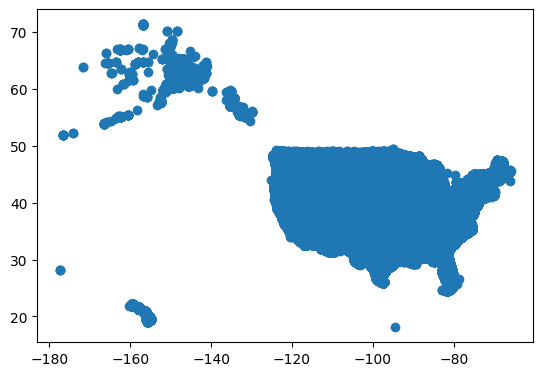

In [41]:
out.plot()